Copyright (C) 2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

用gensim学习word2vec https://www.cnblogs.com/pinard/p/7278324.html

In [7]:
# -*- coding: utf-8 -*-

import jieba, codecs
import jieba.analyse

jieba.suggest_freq('沙瑞金', True)
jieba.suggest_freq('田国富', True)
jieba.suggest_freq('高育良', True)
jieba.suggest_freq('侯亮平', True)
jieba.suggest_freq('钟小艾', True)
jieba.suggest_freq('陈岩石', True)
jieba.suggest_freq('欧阳菁', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('蔡成功', True)
jieba.suggest_freq('孙连城', True)
jieba.suggest_freq('季昌明', True)
jieba.suggest_freq('丁义珍', True)
jieba.suggest_freq('郑西坡', True)
jieba.suggest_freq('赵东来', True)
jieba.suggest_freq('高小琴', True)
jieba.suggest_freq('赵瑞龙', True)
jieba.suggest_freq('林华华', True)
jieba.suggest_freq('陆亦可', True)
jieba.suggest_freq('刘新建', True)
jieba.suggest_freq('刘庆祝', True)

with codecs.open('./in_the_name_of_people.txt', 'r', 'utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    with codecs.open('./in_the_name_of_people_segment.txt', 'w', 'utf-8') as f2:
        f2.write(result)

In [28]:
# import modules & set up logging
import logging
import os
from gensim.models import word2vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence('./in_the_name_of_people_segment.txt') 
# for sentence in sentences:
#     logging.info(sentence)
model = word2vec.Word2Vec(sentences, hs=1, min_count=1, window=3, size=100, iter=10) 
model.wv.save_word2vec_format('in_the_name_of_people_emb.txt')


2019-06-05 14:19:04,626 : INFO : collecting all words and their counts
2019-06-05 14:19:04,628 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-05 14:19:04,696 : INFO : collected 17878 word types from a corpus of 161343 raw words and 2311 sentences
2019-06-05 14:19:04,697 : INFO : Loading a fresh vocabulary
2019-06-05 14:19:04,750 : INFO : effective_min_count=1 retains 17878 unique words (100% of original 17878, drops 0)
2019-06-05 14:19:04,755 : INFO : effective_min_count=1 leaves 161343 word corpus (100% of original 161343, drops 0)
2019-06-05 14:19:04,860 : INFO : deleting the raw counts dictionary of 17878 items
2019-06-05 14:19:04,861 : INFO : sample=0.001 downsamples 38 most-common words
2019-06-05 14:19:04,862 : INFO : downsampling leaves estimated 120578 word corpus (74.7% of prior 161343)
2019-06-05 14:19:04,883 : INFO : constructing a huffman tree from 17878 words
2019-06-05 14:19:05,424 : INFO : built huffman tree with maximum node depth 17


In [29]:
req_count = 5
for key in model.wv.similar_by_word('李达康', topn =100):
    if len(key[0])==3:
        req_count -= 1
        logging.info(key[0], key[1])
        if req_count == 0:
            break;

2019-06-05 14:19:19,618 : INFO : precomputing L2-norms of word weight vectors


高育良 0.8704541325569153
沙瑞金 0.8537372350692749
祁同伟 0.8507247567176819
侯亮平 0.8501299619674683
季昌明 0.8454056978225708


/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [17]:
req_count = 5
for key in model.wv.similar_by_word('沙瑞金', topn =100):
    if len(key[0])==3:
        req_count -= 1
        logging.info(key[0], key[1])
        if req_count == 0:
            break;

高育良 0.9730877876281738
李达康 0.9461990594863892
侯亮平 0.9447282552719116
田国富 0.9401482939720154
易学习 0.9315924048423767


In [19]:
logging.info(model.wv.similarity('沙瑞金', '高育良'))
logging.info(model.wv.similarity('李达康', '王大路'))

0.9730877
0.94175184


In [20]:
logging.info(model.wv.doesnt_match(u"沙瑞金 高育良 李达康 刘庆祝".split()))

刘庆祝


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


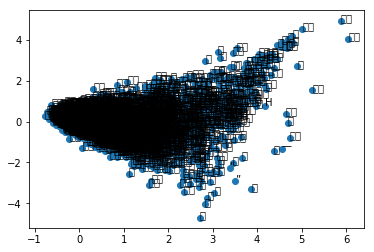

In [34]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()